#Charges between Smoker and Nonsmoker

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns

import scipy.stats as stats
from scipy.stats import chi2_contingency

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [2]:
path = '/content/insurance.csv'
df = pd.read_csv(path)

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


###Target Feature: `bmi`

In [4]:
df.shape

(1338, 7)

In [5]:
df.info

<bound method DataFrame.info of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>

In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


##Target

I want to determine whether the average charges of smokers are higher or lesser than non-smokers.

Null: $ \mu_{1} \leq \mu_{2} $, The average charges of smokers are less than or equal to nonsmokers. \
Alternate: $ \mu_{1} > \mu_{2} $, The average charges of smokers are greater than nonsmokers.

In [30]:
smoker = df.loc[df.smoker=="yes"]
smoker_charges = smoker.charges
smoker_mean = smoker_charges.mean()
smoker_mean

32050.23183153284

In [32]:
nonsmoker = df.loc[df.smoker=="no"]
nonsmoker_charges = nonsmoker.charges
nsmoker_mean = nonsmoker_charges.mean()
nsmoker_mean

8434.268297856204

### Box Plotting

[Text(0.5, 1.0, 'Fig:1 Smoker vs Charges')]

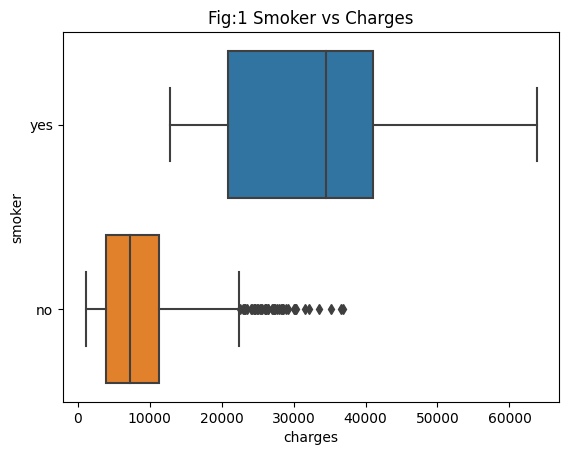

In [35]:
sns.boxplot(x=df.charges, y=df.smoker).set(title="Fig:1 Smoker vs Charges")

###T Value & P Value Identification

In [40]:
alpha = 0.05
t_value, p_value = stats.ttest_ind(smoker_charges,nonsmoker_charges)
p_value_onetail = p_value/2
print(f" t={t_value}, \n p={p_value}, \n onetail p={p_value_onetail}")

 t=46.66492117272371, 
 p=8.271435842179102e-283, 
 onetail p=4.135717921089551e-283


##Final Step

In [41]:
if p_value < alpha:
  print(f"As p={p_value} is lesser than alpha={alpha}, I'm rejecting Null")
else:
  print(f"As p={p_value} is greater than alpha ={alpha}, I'm accepting Null")

As p=8.271435842179102e-283 is lesser than alpha=0.05, I'm rejecting Null
